In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import math

# !pip install ta
import ta
# from mpl_finance import candlestick2_ohlc

# from tqdm import tqdm
from tqdm.contrib.telegram import tqdm, trange
from scipy import optimize
import winsound

# # for using GPU
# from numba import jit, cuda

# to measure exec time
from timeit import default_timer as timer

import json

In [2]:
# save as json

# import json
# import datetime as dt

def save_as_json(inp_dict, output_folder, indent = 4, output_filename_prefix = 'output'):
    now = dt.datetime.now()
    ret = [now.month, now.day, now.hour, now.minute]
    ret = ['0' + str(i) if len(str(i)) == 1 else i for i in ret]
    now_str = "{}{}{}-{}{}-{}".format(now.year, ret[0], ret[1], ret[2], ret[3], now.second)
    output_filename = f'{output_filename_prefix}_{now_str}.json'
    output_path = f'{output_folder}\\{output_filename}'
    
    out_file = open(output_path, "w")
    json.dump(inp_dict, out_file, indent = indent)
    out_file.close()

In [3]:
def send_to_telegram(message, token, chat_id):
    import requests
    apiURL = f'https://api.telegram.org/bot{token}/sendMessage'

    try:
        response = requests.post(apiURL, json={'chat_id': chat_id, 'text': message})
        print(response.text)
    except Exception as e:
        print(e)

# Get Stock Data

In [4]:
# # Download from Yahoo Finance
# ticker = "0388.HK"
# start_date = int(dt.datetime(2005,1,1).timestamp())
# end_date = int(dt.datetime(2015,1,1).timestamp())
# interval = "1d"

# df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval={}&events=history&includeAdjustedClose=true".
#                        format(ticker, start_date, end_date, interval))
# df

In [5]:
df = pd.read_csv(r'C:\Users\Planet Edu\OneDrive\Tutor 導師\George\temp\asset\^GSPC_1d_19280103_20221027.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...,...
23815,2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,3752.750000,5078020000
23816,2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,3797.340088,4747930000
23817,2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000
23818,2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000


# Data Preprocessing

In [6]:
df = df.dropna()

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...,...
23815,2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,3752.750000,5078020000
23816,2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,3797.340088,4747930000
23817,2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000
23818,2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000


In [8]:
# replace Adj Close with Close
# drop the Adj Close column
df['Close'] = df['Adj Close']
df = df.drop(columns = ['Adj Close'])
df

,Date,Open,High,Low,Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...
23815,2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,5078020000
23816,2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,4747930000
23817,2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,4843120000
23818,2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,4817310000


In [9]:
df['Close_ln'] = np.log(df['Close'])
df

,Date,Open,High,Low,Close,Volume,Close_ln
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,0,2.876949
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,0,2.874694
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,0,2.865054
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,0,2.871302
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,0,2.862201
...,...,...,...,...,...,...,...
23815,2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,5078020000,8.230244
23816,2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,4747930000,8.242056
23817,2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,4843120000,8.258192
23818,2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,4817310000,8.250777


# Backtesting for Training and Testing

In [10]:
# Version 3

# @jit(target_backend='cuda') 
def backtest(df, long_rules, short_rules, long_only = True, \
             initial_capital=100000, commission_percent=0.5, risk_free_rate = 5, \
             buy_next_day=True, date='Date', buy_at = 'Close',\
             signals='Signals', shares='Shares', cash='Cash', stock='Stock', equity='Equity', 
             action_completed = "Action Completed"):
    
    df = df.copy()
    df.reset_index(drop=False, inplace=True)
    
    # Assume no short selling allowed
    # ie sell holing stocks whenever a short signal is triggered
    
    # Check for any conflicts between long_rules and short_rules
    for i in range(len(long_rules)):
        # Cannot long/short at the same time
        if abs(long_rules[i])>0 and abs(short_rules[i])>0:
            return 'Signal problem(s) found at index {}'.format(i)
    
    # Init
    action_delay = 1 if buy_next_day else 0
    
    df[signals] = [long_rules[i]+short_rules[i] for i in range(len(long_rules))]
    df.loc[0,cash] = initial_capital
    df.loc[0,stock] = 0
    df.loc[0,shares] = 0
    df.loc[0,action_completed] = 0
    
    def buy_shares(cash, price, commission_percent):
        shares = cash//price
        if price == 0:
            return None
        while shares*price*(1+commission_percent/100)>cash and shares > 0:
            shares -= 1
        return shares
    
    txn_list = []
    # Iterate through the df
    for r in range(1, len(df)):

        # Long triggered
        if df.loc[r-action_delay, signals] > 0:
            if df.loc[r-1, shares] == 0:
                df.loc[r,shares] = buy_shares(cash = df.loc[r-1,cash],\
                                             price = df.loc[r,buy_at],\
                                             commission_percent = commission_percent)
                if df.loc[r,shares] == None:
                    print('Error: at ' + str(r))
                
                df.loc[r,stock] = df.loc[r,shares]*df.loc[r,buy_at]
                df.loc[r,cash] = df.loc[r-1,cash] - df.loc[r,stock]
                
                # update txn_list only if a purchase is really completed
                if df.loc[r,shares] > 0:
                    txn_list.append([r, 1] + list(df.loc[r, [date, shares, stock, cash]]))
                    df.loc[r,action_completed] = 1
                else:
                    df.loc[r,action_completed] = 0
            else:
                # Hold/No Action
                df.loc[r,shares] = df.loc[r-1, shares]
                df.loc[r,cash] = df.loc[r-1,cash]
                df.loc[r,stock] = df.loc[r-1,stock]
                df.loc[r,action_completed] = 0
            
        # Short triggered/ Selling triggered for Long-Only Appraoch
        elif df.loc[r-action_delay, signals] < 0:
            df.loc[r,shares] = 0
            df.loc[r,stock] = 0
            df.loc[r,cash] = df.loc[r-1,cash] + df.loc[r-1,shares]*df.loc[r,buy_at]*(1-commission_percent/100)
            # update txn_list only if a sale is really completed (ie previously holding the stock)
            if df.loc[r-1,shares] > 0:
                txn_list.append([r, -1] + list(df.loc[r, [date, shares, stock, cash]]))
            
            df.loc[r,action_completed] = 0 if df.loc[r,shares] == df.loc[r-1,shares] else -1

        # Hold/No Action
        else:
            df.loc[r,shares] = df.loc[r-1,shares]
            df.loc[r,stock] = df.loc[r,shares]*df.loc[r,buy_at]
            df.loc[r,cash] = df.loc[r-1,cash]
            df.loc[r,action_completed] = 0
            
    df[equity] = df[cash] + df[stock] 
    
       
    # -----------------------------------------------------------------------------------------------------
    # analyze the transactions
    def get_pct_change(x_prev, x_new, scale = 100):
        if x_prev == 0.:
            ret_sgn = np.sign([x_prev, x_new]).prod()
            return -math.inf if ret_sgn < 0 else math.inf
        else: 
            return scale*(x_new/x_prev-1)
    
    # consider each PAIR of buying and selling
    # buy-and-hold return % 
    bnh_pct = get_pct_change(x_prev = df.loc[df.index[0],equity], 
                             x_new = df.loc[df.index[-1],equity], 
                             scale = 100) 
    txn_df = pd.DataFrame(txn_list, columns = ['idx', 'action', 'date', 'shares', 'stock', 'cash'])
    if len(txn_df) >=2:
        txn_df['equity'] = txn_df['cash'] + txn_df['stock']

        # return of each pair of transaction
        i = 0
        txn_df['return_txnpair'] = np.nan
        txn_df['return_pct_txnpair'] = np.nan
        while i <= len(txn_list)-2:  
            txn_df.loc[i, 'return_txnpair'] = txn_df.loc[i+1, 'equity'] - txn_df.loc[i, 'equity']
            txn_df.loc[i, 'return_pct_txnpair'] = get_pct_change(x_prev = txn_df.loc[i, 'equity'], 
                                                                 x_new = txn_df.loc[i+1, 'equity'], 
                                                                 scale = 100)
            i+=2
 
        # net profit %
        profit_net_pct = get_pct_change(x_prev = df.loc[df.index[0],buy_at], 
                                        x_new = df.loc[df.index[-1],buy_at], 
                                        scale = 100)
#         print(f'profit_net_pct: {profit_net_pct}')
        
        # gross profit, gross loss, and their %
        profit_gross = txn_df[txn_df['return_txnpair'] > 0]['return_txnpair'].sum()
        profit_gross_pct = get_pct_change(x_prev = initial_capital, 
                                          x_new = initial_capital+profit_gross, 
                                          scale = 100)
#         print(f'profit_net_pct: {profit_net_pct}')
        
        loss_gross = txn_df[txn_df['return_txnpair'] <= 0]['return_txnpair'].sum()
        loss_gross_pct = get_pct_change(x_prev = initial_capital, 
                                        x_new = initial_capital+loss_gross, 
                                        scale = 100)
#         print(f'loss_gross_pct: {loss_gross_pct}')
        
        # profit factor
        profit_factor = profit_gross / loss_gross if abs(loss_gross) > 0 else 10**9    # prevent DivisionByZero
        
#         print(f'profit_factor: {profit_factor}')

        # max run-up and max draw-down
        runup_pct_max = txn_df['return_pct_txnpair'].max()
        drawdown_pct_max = txn_df['return_pct_txnpair'].min()    # using min because the drawdown % is neg
        
#         print(f'runup_pct_max: {runup_pct_max}')
#         print(f'drawdown_pct_max: {drawdown_pct_max}')

        # Sharpe & Sortino; Avg Trade (geo mean) (mean_return_pct_annual)
        # Also the avg winning trade and avg losing trade
        dayscount_backtest = len(df)    # neglect days without prices, eg public holidays
#         print(f'dayscount_backtest: {dayscount_backtest}')

        mean_return_pct_annual = txn_df['return_pct_txnpair'].dropna().apply(lambda x: x/100 + 1)
        mean_return_pct_annual = np.power(mean_return_pct_annual.product(), 250/dayscount_backtest)-1    # assume 250 trading days annually
#         print(f'mean_return_pct_annual: {mean_return_pct_annual}')
        
        sd_return_pct_annual = txn_df['return_pct_txnpair'].std(ddof = 0)
        
        sd_return_pct_annual *= np.sqrt(dayscount_backtest)    # assume daily data input, and so annualized by multiplying sqrt(days coount)
#         print(f'sd_return_pct_annual: {sd_return_pct_annual}')
        
        sd_downside_return_pct_annual = txn_df[txn_df['return_pct_txnpair'] <= 0]['return_pct_txnpair'].std(ddof = 0)
        sd_downside_return_pct_annual *= np.sqrt(dayscount_backtest)    # assume daily data input, and so annualized by multiplying sqrt(days coount)
#         print(f'sd_downside_return_pct_annual: {sd_downside_return_pct_annual}')
        
        sharpe_annual = None if math.isnan(sd_return_pct_annual) or sd_return_pct_annual == 0. else \
        (mean_return_pct_annual - risk_free_rate)/sd_return_pct_annual
        
        sortino_annual = None if math.isnan(sd_downside_return_pct_annual) or sd_downside_return_pct_annual == 0. else \
        (mean_return_pct_annual - risk_free_rate)/sd_downside_return_pct_annual

        # Avg winning trade
        # here debug 2022-11-04 WIP
        avg_loss_pct_annual = None
        avg_win_pct_annual = None
        avg_wintoloss_ratio_annual = None
        
#         if math.isnan(mean_return_pct_annual[mean_return_pct_annual > 0].prod()):
#             avg_win_pct_annual = None
#         else:
#             avg_win_pct_annual = np.power(mean_return_pct_annual[mean_return_pct_annual > 0].prod(), 250/dayscount_backtest)-1
        
#         # Avg losing trade
#         if math.isnan(mean_return_pct_annual[mean_return_pct_annual <= 0]):
#             avg_loss_pct_annual = None
#         else:
#             avg_loss_pct_annual = np.power(mean_return_pct_annual[mean_return_pct_annual <= 0].prod(), 250/dayscount_backtest)-1
            
#         # Avg Win-to-Loss Ratio
#         if avg_loss_pct_annual == None or avg_win_pct_annual == None:
#             avg_wintoloss_ratio_annual = None
#         elif avg_loss_pct_annual == 0:
#             avg_wintoloss_ratio_annual = math.inf
#         else:
#             avg_wintoloss_ratio_annual = avg_win_pct_annual/avg_loss_pct_annual

        # Max Contracts Held (max_shares)
        max_shares = txn_df['shares'].max()

        # Number Winning Trades and Losing Trades and win rate (win_pct)
        txn_pairs = txn_df['return_pct_txnpair'].dropna()
        win_count = len(txn_pairs[txn_pairs>0])
        loss_count = len(txn_pairs[txn_pairs<=0])
        win_pct = 100*win_count/len(txn_pairs)  
        
#         print(f'win_count, loss_count, win_pct: {win_count}, {loss_count}, {win_pct}')

        txn_summary = {'bnh_pct': bnh_pct, 
                       'profit_net_pct': profit_net_pct, 
                       'profit_gross_pct': profit_gross_pct, 
                       'loss_gross_pct': loss_gross_pct, 
                       'profit_factor': profit_factor, 
                       'runup_pct_max': runup_pct_max, 
                       'drawdown_pct_max': drawdown_pct_max, 
                       'mean_return_pct_annual': mean_return_pct_annual, 
                       'sd_return_pct_annual': sd_return_pct_annual, 
                       'sd_downside_return_pct_annual': sd_downside_return_pct_annual, 
                       'risk_free_rate': risk_free_rate,
                       'sharpe_annual': sharpe_annual, 
                       'sortino_annual': sortino_annual, 
                       'avg_win_pct_annual': avg_win_pct_annual, 
                       'avg_loss_pct_annual': avg_loss_pct_annual, 
                       'avg_wintoloss_ratio_annual': avg_wintoloss_ratio_annual, 
                       'max_shares': max_shares, 
                       'win_count': win_count, 
                       'loss_count':loss_count,
                       'win_pct': win_pct, 
                       'txn_list': txn_list}
    else:
        txn_summary = {'bnh_pct': bnh_pct, 
                       'profit_net_pct': None, 
                       'profit_gross_pct': None, 
                       'loss_gross_pct': None, 
                       'profit_factor': None, 
                       'runup_pct_max': None, 
                       'drawdown_pct_max': None, 
                       'mean_return_pct_annual': None, 
                       'sd_return_pct_annual': None, 
                       'sd_downside_return_pct_annual': None, 
                       'risk_free_rate': risk_free_rate,
                       'sharpe_annual': None, 
                       'sortino_annual': None, 
                       'avg_win_pct_annual': 0, 
                       'avg_loss_pct_annual': None, 
                       'avg_wintoloss_ratio_annual': None, 
                       'max_shares': 0, 
                       'win_count': 0, 
                       'loss_count':0,
                       'win_pct': 0, 
                       'txn_list': txn_list}
    

    
#     # testing, wait for debug
#     # debug here 2022-10-31 0204
    
#     txn_df = pd.DataFrame()
#     txn_summary = dict()
    
    return (df, txn_df, txn_summary)
    

In [11]:
# # Version 2

# # @jit(target_backend='cuda') 
# def backtest(df, long_rules, short_rules, long_only = True, \
#              initial_capital=100000, commission_percent=0.5, risk_free_rate = 5, \
#              buy_next_day=True, date='Date', buy_at = 'Close',\
#              signals='Signals', shares='Shares', cash='Cash', stock='Stock', equity='Equity'):
    
#     df = df.copy()
#     df.reset_index(drop=False, inplace=True)
    
#     # Assume no short selling allowed
#     # ie sell holing stocks whenever a short signal is triggered
    
#     # Check for any conflicts between long_rules and short_rules
#     for i in range(len(long_rules)):
#         # Cannot long/short at the same time
#         if abs(long_rules[i])>0 and abs(short_rules[i])>0:
#             return 'Signal problem(s) found at index {}'.format(i)
    
#     # Init
#     action_delay = 1 if buy_next_day else 0
    
#     df[signals] = [long_rules[i]+short_rules[i] for i in range(len(long_rules))]
#     df.loc[0,cash] = initial_capital
#     df.loc[0,stock] = 0
#     df.loc[0,shares] = 0
    
#     def buy_shares(cash, price, commission_percent):
#         shares = cash//price
#         if price == 0:
#             return None
#         while shares*price*(1+commission_percent/100)>cash and shares > 0:
#             shares -= 1
#         return shares
    
#     txn_list = []
#     # Iterate through the df
#     for r in range(1, len(df)):

#         # Long triggered
#         if df.loc[r-action_delay, signals] > 0:
#             if df.loc[r-1, shares] == 0:
#                 df.loc[r,shares] = buy_shares(cash = df.loc[r-1,cash],\
#                                              price = df.loc[r,buy_at],\
#                                              commission_percent = commission_percent)
#                 if df.loc[r,shares] == None:
#                     print('Error: at ' + str(r))
                
#                 df.loc[r,stock] = df.loc[r,shares]*df.loc[r,buy_at]
#                 df.loc[r,cash] = df.loc[r-1,cash] - df.loc[r,stock]
#                 txn_list.append([r] + list(df.loc[r, [date, shares, stock, cash]]))
#             else:
#                 df.loc[r,shares] = df.loc[r-1, shares]
#                 df.loc[r,cash] = df.loc[r-1,cash]
#                 df.loc[r,stock] = df.loc[r-1,stock]
            
#         # Short triggered/ Selling triggered for Long-Only Appraoch
#         elif df.loc[r-action_delay, signals] < 0:
#             df.loc[r,shares] = 0
#             df.loc[r,stock] = 0
#             df.loc[r,cash] = df.loc[r-1,cash] + df.loc[r-1,shares]*df.loc[r,buy_at]*(1-commission_percent/100)
#             txn_list.append([r] + list(df.loc[r, [date, shares, stock, cash]]))

#         # Hold/No Action
#         else:
#             df.loc[r,shares] = df.loc[r-1,shares]
#             df.loc[r,stock] = df.loc[r,shares]*df.loc[r,buy_at]
#             df.loc[r,cash] = df.loc[r-1,cash]
            
#     df[equity] = df[cash] + df[stock] 
    
#     # -----------------------------------------------------------------------------------------------------
#     # analyze the transactions
#     def get_pct_change(x_prev, x_new, scale = 100):
#         return scale*(x_new/x_prev-1)
    
#     # consider each PAIR of buying and selling
#     # buy-and-hold return % 
#     bnh_pct = get_pct_change(x_prev = df.loc[df.index[0],equity], 
#                              x_new = df.loc[df.index[-1],equity], 
#                              scale = 100) 
#     txn_df = pd.DataFrame(txn_list, columns = ['idx', 'date', 'shares', 'stock', 'cash'])
#     if len(txn_df) >=2:
#         txn_df['equity'] = txn_df['cash'] + txn_df['stock']

#         # return of each pair of transaction
#         i = 0
#         txn_df['return_txnpair'] = np.nan
#         txn_df['return_pct_txnpair'] = np.nan
#         while i <= len(txn_list)-2:  
#             txn_df.loc[i, 'return_txnpair'] = txn_df.loc[i+1, 'equity'] - txn_df.loc[i, 'equity']
#             txn_df.loc[i, 'return_pct_txnpair'] = get_pct_change(x_prev = txn_df.loc[i, 'equity'], 
#                                                                  x_new = txn_df.loc[i+1, 'equity'], 
#                                                                  scale = 100)
#             i+=2
 
#         # net profit %
#         profit_net_pct = get_pct_change(x_prev = df.loc[df.index[0],buy_at], 
#                                         x_new = df.loc[df.index[-1],buy_at], 
#                                         scale = 100)
#         # gross profit, gross loss, and their %
#         profit_gross = txn_df[txn_df['return_txnpair'] > 0].sum()
#         profit_gross_pct = get_pct_change(x_prev = initial_capital, 
#                                           x_new = initial_capital+profit_gross, 
#                                           scale = 100)
#         loss_gross = txn_df[txn_df['return_txnpair'] <= 0].sum()
#         loss_gross_pct = get_pct_change(x_prev = initial_capital, 
#                                         x_new = initial_capital+loss_gross, 
#                                         scale = 100)
#         # profit factor
#         profit_factor = profit_gross / loss_gross

#         # max run-up and max draw-down
#         runup_pct_max = txn_df['return_pct_txnpair'].max()
#         drawdown_pct_max = txn_df['return_pct_txnpair'].min()    # using min because the drawdown % is neg

#         # Sharpe & Sortino; Avg Trade (geo mean) (mean_return_pct_annual)
#         # Also the avg winning trade and avg losing trade
#         dayscount_backtest = len(df)    # neglect days without prices, eg public holidays

#         mean_return_pct_annual = txn_df['return_pct_txnpair'].dropna().apply(lambda x: x/100 + 1)
#         mean_return_pct_annual = np.power(mean_return_pct_annual.product(), 250/dayscount_backtest)-1    # assume 250 trading days annually

#         sd_return_pct_annual = txn_df['return_pct_txnpair'].std(ddof = 0)
#         sd_return_pct_annual *= np.sqrt(dayscount_backtest)    # assume daily data input, and so annualized by multiplying sqrt(days coount)

#         sd_downside_return_pct_annual = txn_df[txn_df['return_pct_txnpair'] <= 0].std(ddof = 0)
#         sd_downside_return_pct_annual *= np.sqrt(dayscount_backtest)    # assume daily data input, and so annualized by multiplying sqrt(days coount)

#         sharpe_annual = (mean_return_pct_annual - risk_free_rate)/sd_return_pct_annual
#         sortino_annual = (mean_return_pct_annual - risk_free_rate)/sd_downside_return_pct_annual

#         # Avg winning trade, avg losing trade, and their ratio
#         avg_win_pct_annual = np.power(mean_return_pct_annual[mean_return_pct_annual > 0].prod(), 250/dayscount_backtest)-1
#         avg_loss_pct_annual = np.power(mean_return_pct_annual[mean_return_pct_annual <= 0].prod(), 250/dayscount_backtest)-1
#         avg_wintoloss_ratio_annual = avg_win_pct_annual/avg_loss_pct_annual

#         # Max Contracts Held (max_shares)
#         max_shares = txn_df['shares'].max()

#         # Number Winning Trades and win rate (win_pct)
#         txn_pairs = txn_df['return_pct_txnpair'].dropna()
#         win_count = len(txn_pairs[txn_pairs>0])
#         win_pct = 100*win_count/len(txn_pairs)        

#         txn_summary = {'bnh_pct': bnh_pct, 
#                        'profit_net_pct': profit_net_pct, 
#                        'profit_gross_pct': profit_gross_pct, 
#                        'loss_gross_pct': loss_gross_pct, 
#                        'profit_factor': profit_factor, 
#                        'runup_pct_max': runup_pct_max, 
#                        'drawdown_pct_max': drawdown_pct_max, 
#                        'mean_return_pct_annual': mean_return_pct_annual, 
#                        'sd_return_pct_annual': sd_return_pct_annual, 
#                        'sd_downside_return_pct_annual': sd_downside_return_pct_annual, 
#                        'risk_free_rate': risk_free_rate,
#                        'sharpe_annual': sharpe_annual, 
#                        'sortino_annual': sortino_annual, 
#                        'avg_win_pct_annual': avg_win_pct_annual, 
#                        'avg_loss_pct_annual': avg_loss_pct_annual, 
#                        'avg_wintoloss_ratio_annual': avg_wintoloss_ratio_annual, 
#                        'max_shares': max_shares, 
#                        'win_count': win_count, 
#                        'win_pct': win_pct}
#     else:
#         txn_summary = {'bnh_pct': bnh_pct, 
#                        'profit_net_pct': None, 
#                        'profit_gross_pct': None, 
#                        'loss_gross_pct': None, 
#                        'profit_factor': None, 
#                        'runup_pct_max': None, 
#                        'drawdown_pct_max': None, 
#                        'mean_return_pct_annual': None, 
#                        'sd_return_pct_annual': None, 
#                        'sd_downside_return_pct_annual': None, 
#                        'risk_free_rate': risk_free_rate,
#                        'sharpe_annual': None, 
#                        'sortino_annual': None, 
#                        'avg_win_pct_annual': None, 
#                        'avg_loss_pct_annual': None, 
#                        'avg_wintoloss_ratio_annual': None, 
#                        'max_shares': None, 
#                        'win_count': 0, 
#                        'win_pct': None}
    
#     # testing, wait for debug
#     # debug here 2022-10-31 0204
    
# #     txn_df = pd.DataFrame()
# #     txn_summary = dict()
    
#     return (df, txn_df, txn_summary)
    

In [12]:
# @jit(target_backend='cuda')
def add_dc(df, dc_source, dc_len, bound_pct = 0, bound = 'both'):
    df = df.copy()
    
    if bound.lower() == 'upper':
        df['{}-Period High'.format(dc_len)] = df[dc_source].rolling(dc_len).max().apply(lambda x: (1+bound_pct)*x)
    
    elif bound.lower() == 'lower':
        df['{}-Period Low'.format(dc_len)] = df[dc_source].rolling(dc_len).min().apply(lambda x: (1-bound_pct)*x)
    
    elif bound == 'both':
        df['{}-Period High'.format(dc_len)] = df[dc_source].rolling(dc_len).max().apply(lambda x: (1+bound_pct)*x)
        df['{}-Period Low'.format(dc_len)] = df[dc_source].rolling(dc_len).min().apply(lambda x: (1-bound_pct)*x)
    else:
        assert False, '\'bound\' is expected to be either \'upper\', \'lower\', or \'both\'.'
    return df

In [13]:
# here 2022-11-05 0951 WIP
# assert False, 'here 2022-11-05 0951 WIP'
def add_kama(df, src_colname, delta_len = 10, fast_len = 2, slow_len = 30, with_kama_mean = True, kama_mean_len = 25, fillna = False):
    df = df.copy()
    kama = ta.momentum.kama(close=df[src_colname], 
                            window = delta_len, 
                            pow1 = fast_len, 
                            pow2 = slow_len, 
                            fillna = False)
    df[f'KAMA({src_colname}, {delta_len}, {fast_len}, {slow_len})'] = kama
    if with_kama_mean:
        # shifted KAMA by the mean of residual within a rolling window
        rsd = df[src_colname] - kama                          # kama here is the original KAMA
        rsd_mean = rsd.rolling(kama_mean_len).mean()
        kama_mean = kama + rsd_mean                           # shifted KAMA-Mean
        df[f'KAMA-Mean({src_colname}, {delta_len}, {fast_len}, {slow_len}, {kama_mean_len})'] = kama_mean  
    return df

In [14]:
def delta(inp_list):
    # last value - start value
    return inp_list[-1] - inp_list[0]

In [15]:
# Caution: 
# 1. df_temp is to be assigned OUTSIDE the function below
# 2. input of the function below CANNOT be changed, or otherwise optimization cannot be performed.

# @jit(target_backend='cuda')
def objective_func(x):
    global df_temp, df_bt, txn_df, txn_summary
    
    # ==============================================================================================
    # KAMA-Mean
    # here 2022-11-05 0951 WIP
    n_delta, n_fast, n_slow, delta_lim_up, delta_lim_dn, delta_lim_len, kama_mean_len = x
    
    src_name = 'Close_ln'
    n_delta = int(round(n_delta,0))    # ensure integer
    n_fast = int(round(n_fast,0))      # ensure integer
    n_slow = int(round(n_slow,0))      # ensure integer
    kama_mean_len = int(round(kama_mean_len, 0))    # ensure integer
    delta_lim_len = int(round(delta_lim_len, 0))    # ensure integer
    
    df_temp = add_kama(df = df_temp, 
                       src_colname = src_name, 
                       delta_len = n_delta, 
                       fast_len = n_fast, 
                       slow_len = n_slow, 
                       with_kama_mean = True, 
                       kama_mean_len = kama_mean_len, 
                       fillna = False)
    ub_col = f'KAMA({src_name}, {n_delta}, {n_fast}, {n_slow})'
    lb_col = f'KAMA-Mean({src_name}, {n_delta}, {n_fast}, {n_slow}, {kama_mean_len})'
    kama_delta_col = f'delta({ub_col}, {delta_lim_len})'
    
    kama_delta = df_temp[ub_col].rolling(delta_lim_len).apply(lambda x: delta(list(x)))    # Caution: delta of KAMA, not of KAMA-Mean
    df_temp[kama_delta_col] = kama_delta    # Caution: delta of KAMA, not of KAMA-Mean
    
    # buying / selling actions 
    long_actions = df_temp[kama_delta_col] - delta_lim_up
    long_actions = long_actions.apply(lambda x: 1 if x > 0 else None)
    df_temp['long_actions'] = long_actions  

    short_actions = df_temp[src_name] - df_temp[lb_col]
    short_actions = short_actions.apply(lambda x: -1 if x < 0 else None)
    df_temp['short_actions'] = short_actions
    
    # ==============================================================================================
    
#     # ==============================================================================================
#     # DC

#     global n_up_interval, n_dn_interval

#     # init
#     n_up, n_dn, bound_up_pct, bound_dn_pct = x    
#     n_up = int(round(n_up,0))    # ensure integer
#     n_dn = int(round(n_dn,0))    # ensure integer
    
#     n_up *= n_up_interval
#     n_dn *= n_dn_interval
    
#     # ----------------------------------
#     # add DC bounds
#     df_temp = add_dc(df = df_temp, 
#                      dc_source = 'Close', 
#                      dc_len = n_up, 
#                      bound_pct = 0, 
#                      bound = 'upper')
#     df_temp = add_dc(df = df_temp, 
#                      dc_source = 'Close', 
#                      dc_len = n_dn, 
#                      bound_pct = 0, 
#                      bound = 'lower')
#     ub_col = f'{n_up}-Period High'
#     lb_col = f'{n_dn}-Period Low'
    
#     # buying / selling actions 
#     long_actions = (df_temp['Close'] / df_temp[ub_col].shift(1) - 1) - bound_up_pct
#     long_actions = long_actions.apply(lambda x: 1 if x > 0 else None)
#     df_temp['long_actions'] = long_actions  

#     short_actions = (df_temp['Close'] / df_temp[lb_col].shift(1) - 1) - bound_dn_pct
#     short_actions = short_actions.apply(lambda x: -1 if x < 0 else None)
#     df_temp['short_actions'] = short_actions
    
#     # ==============================================================================================
    
    
    # integrate the buying and selling actions (ie a signal)
    # no delay is assumed
    actions = pd.Series(zip(long_actions, short_actions))
    del long_actions, short_actions
    
    actions = actions.apply(lambda x: -1 if x[1] == -1 else 1 if x[0] == 1 else 0)
    df_temp['actions'] = list(actions)    # must turn into a list so as to prevent future errors out of non-matching index
    
    del actions
    
    # debug here 2022-11-03 0004 WIP
    # testing

    # ----------------------------------------------------------------------------------------------
    # backtest
    # input
    initial_capital = 10**5
    long_rules = df_temp['actions'].apply(lambda x: 1 if x == 1 else 0).to_list()
    short_rules = df_temp['actions'].apply(lambda x: -1 if x == -1 else 0).to_list()
    buy_at = 'Close'
    commission_percent = 0.5
    buy_next_day = True

    df_bt, txn_df, txn_summary = backtest(df = df_temp, 
                                          long_rules = long_rules,
                                          short_rules = short_rules,
                                          buy_at = buy_at,
                                          initial_capital = initial_capital, 
                                          commission_percent = commission_percent, 
                                          buy_next_day = buy_next_day)
    
    bt_return_pct = 100*(df_bt.loc[df_bt.index[-1], 'Equity']/initial_capital-1)
    bt_return_pct_signflipped = -bt_return_pct
    win_count = txn_summary['win_count']
    loss_count = txn_summary['loss_count']
    
    # ----------------------------------------------------------------------------------------------
    # objective function
        
#     # version 1
#     bt_ret = bt_return_pct_signflipped
    
#     # version 2
#     bt_ret = bt_return_pct_signflipped + - win_count**2
    
    # version 3
    bt_ret = - win_count**2 + loss_count**2
    
#     # version 4
#     bt_ret = - bt_return_pct - win_count**2 + loss_count**2
    
#     print(f'bt_ret, win_count, bt_return_pct, x\': {bt_ret}, {win_count}, {bt_return_pct}, {[n_up, n_dn, bound_up_pct, bound_dn_pct]}')

    return bt_ret

In [16]:
# test = pd.DataFrame({'Date': df.loc[0:23, 'Date'], 'Close': list(range(12)) + [12 - i for i in range(12)]})
# # test = add_dc( df = test, dc_source = 'Close', dc_len = 5)
# test
# # =====================================================
# df_temp = test.copy()
# n_up_interval, n_dn_interval = 5, 5
# objective_func([1,1,0,0])


In [17]:
# txn_df

In [21]:
# from tqdm import tqdm
# from scipy import optimize
# import datetime as dt
# import winsound

# ----------------------------------------------------------------------------------
# inputs
# inputs for results output and notifications in telegram
output_folder = r"C:\Users\Planet Edu\OneDrive\Tutor 導師\George\temp\temp outputs\2022-11-13 (PlanetEdu DT)"
token = '5651860543:AAEbzdr2mlQUlaU8UELy-vHEnpY-_drKvbw'
chat_id ='-461870643'

# inputs for data separation into training and testing set
rows_toview = 18077                        # define the start of the 1st period for training and testing
period_toview = 250*2 + 125                # 2.5 years
train_pct = 0.8                            # normally taken as 0.7 ~ 0.8

# inputs for optimization
optim_model = 'DA'     # this is just for showing in the returning results
maxiter = 1000
seed = 1

checker = 0    # a checker to ensure only 1 strategy is to be tested

# inputs for the bounds for optimization: 
# =======================================================================================================
# KAMA & KAMA-Mean
# n_delta, n_fast, n_slow, delta_lim_up, delta_lim_dn, delta_lim_len, kama_mean_len
strat_name = 'KAMA with KAMA-Mean'
bounds = [(3, 20), 
          (2, 5), (10, 100), 
          (0, 0.1), (0, 0.1), 
          (2, 5), (5, 100)]

checker += 1
# # =======================================================================================================
# # DC
# # inputs for the bounds for optimization: 
# # n_up (to be multiplied by the interval), n_dn (to be multiplied by 10), bound_up_pct, bound_dn_pct
# strat_name = 'DC'
# bounds = [(1, 20), (1, 20), 
#           (0, 0.1), (0, 0.1)]

# n_up_interval = 5
# n_dn_interval = 5

# checker += 1

# =======================================================================================================

# ----------------------------------------------------------------------------------
assert checker == 1., f"Only 1 stategy can be tested each time, but there are {checker} detected! Check the codes corresponding to the inputs part."
del checker

print(f'''
token: {token}
chat_id: {chat_id}
''')

param_info = f'''
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

strat_name: {strat_name}
dt.datetime.now(): {dt.datetime.now()}

Param.

output_folder: {output_folder}
rows_toview: {rows_toview}
period_toview: {period_toview}
train_pct: {train_pct}
maxiter: {maxiter}
seed: {seed}
bounds: {bounds}
'''
print(param_info)

# print('\nXXXXXXXXfXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n')
# print(f'strat_name: {strat_name}\n')
# print('Param.\n')
# print(f'output_folder: {output_folder}')
# print(f'rows_toview: {rows_toview}')
# print(f'period_toview: {period_toview}')
# print(f'train_pct: {train_pct}')
# print(f'maxiter: {maxiter}')
# print(f'bounds: {bounds}')



# ----------------------------------------------------------------------------------
# init.
results = dict()
period_test = int(round((1-train_pct)*period_toview,0))

# get intervals for traing and testing
print('\nXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n')
print('\nIntervals of Periods: \n')

periods = [((rows_toview+period_test*i, df.loc[rows_toview+period_test*i, 'Date']), 
            (rows_toview+period_test*i+period_toview-1, df.loc[rows_toview+period_test*i+period_toview-1, 'Date'])) for i in range(40)]
# # Superseded
# # Originally, in the trial, overall periods for training and testing are defined as below:
# periods = [((rows_toview+period_toview*i, df.loc[rows_toview+period_toview*i, 'Date']), 
#             (rows_toview+period_toview*(i+1)-1, df.loc[rows_toview+period_toview*(i+1)-1, 'Date'])) for i in range(9)]


for p in range(len(periods)):
    print((p, periods[p]))


token: 5651860543:AAEbzdr2mlQUlaU8UELy-vHEnpY-_drKvbw
chat_id: -461870643


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

strat_name: KAMA with KAMA-Mean
dt.datetime.now(): 2022-11-13 10:39:50.398228

Param.

output_folder: C:\Users\Planet Edu\OneDrive\Tutor 導師\George\temp\temp outputs\2022-11-13 (PlanetEdu DT)
rows_toview: 18077
period_toview: 625
train_pct: 0.8
maxiter: 1000
seed: 1
bounds: [(3, 20), (2, 5), (10, 100), (0, 0.1), (0, 0.1), (2, 5), (5, 100)]


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


Intervals of Periods: 

(0, ((18077, '2000-01-03'), (18701, '2002-07-01')))
(1, ((18202, '2000-06-30'), (18826, '2002-12-27')))
(2, ((18327, '2000-12-28'), (18951, '2003-06-27')))
(3, ((18452, '2001-06-28'), (19076, '2003-12-24')))
(4, ((18577, '2002-01-02'), (19201, '2004-06-25')))
(5, ((18702, '2002-07-02'), (19326, '2004-12-22')))
(6, ((18827, '2002-12-30'), (19451, '2005-06-22')))
(7, ((18952, '2003-06-30'), (19576, '2005-12-

In [22]:
# send the param_info in telegram
send_to_telegram(message = param_info, 
                 token=token, 
                 chat_id=chat_id)

{"ok":true,"result":{"message_id":372,"from":{"id":5651860543,"is_bot":true,"first_name":"tqdm","username":"tqdmtestbot"},"chat":{"id":-461870643,"title":"TQDM Progress - 2","type":"group","all_members_are_administrators":true},"date":1668307248,"text":"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n\nstrat_name: KAMA with KAMA-Mean\ndt.datetime.now(): 2022-11-13 10:39:50.398228\n\nParam.\n\noutput_folder: C:\\Users\\Planet Edu\\OneDrive\\Tutor \u5c0e\u5e2b\\George\\temp\\temp outputs\\2022-11-13 (PlanetEdu DT)\nrows_toview: 18077\nperiod_toview: 625\ntrain_pct: 0.8\nmaxiter: 1000\nseed: 1\nbounds: [(3, 20), (2, 5), (10, 100), (0, 0.1), (0, 0.1), (2, 5), (5, 100)]","entities":[{"offset":105,"length":15,"type":"url"}]}}


In [20]:
# # Example codes from the internet
# # about the use of GPU

# from numba import jit, cuda
# import numpy as np
   

# # function optimized to run on gpu 
# @jit(target_backend='cuda')                         
# def func2(a):
#     for i in range(10000000):
#         a[i]+= 1
# if __name__=="__main__":
#     n = 10000000                            
#     a = np.ones(n, dtype = np.float64)
      
#     start = timer()
#     func(a)
#     print("without GPU:", timer()-start)    
      
#     start = timer()
#     func2(a)
#     print("with GPU:", timer()-start)

In [23]:
# debug here 2022-10-31
# init
results = dict()

# loop through different intervals for training and testing

for p in tqdm(range(len(periods)-1, 20-1, -1), token=token, chat_id=chat_id):    # doing in reversed order
# for p in tqdm(range(0,len(periods)), token=token, chat_id=chat_id):             # doing in order
    
    # send a telegram message
    send_to_telegram(message = f'Overall Period: {periods[p]} now ({dt.datetime.now()})', token=token, chat_id=chat_id)
    
    # get rows for training and testing
    rows_train = periods[p][0][0], periods[p][0][0] + int(period_toview*train_pct)
    rows_test = rows_train[-1] + 1, periods[p][1][0]

    print('\nXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    print(p)
    print(f'Overall Period: {periods[p]}')
    print('\n~~~ Training : from {} to {}~~~\n'.format(df.loc[rows_train[0], 'Date'], df.loc[rows_train[1], 'Date']))
    
    # separate into df_train and df_test
    df_summary = df.loc[rows_train[0]: rows_test[1], ['Date', 'Close', 'Close_ln']].copy()
    df_train = df_summary.loc[rows_train[0]:rows_train[1],]
    df_test = df_summary.loc[rows_test[0]:rows_test[1],]

    # ----------------------------------------------------------------------------------
    # Training set
    # optimizate param using the df_train
    start_time = dt.datetime.now()
    df_temp = df_train.copy(); optim_results = optimize.dual_annealing(objective_func, bounds = bounds, maxiter = maxiter, seed = seed)
    end_time = dt.datetime.now()
    runtime = end_time - start_time
    optim_results['x'] = list(optim_results['x'])    # for saving in json format
    print('Obj Func Ret: {}'.format(optim_results['fun']))

    # save results to a variable
    date_from = df_train.loc[rows_train[0], 'Date']
    date_to = df_train.loc[rows_train[1], 'Date']
    data_type = 'Training'
    result_entryname_train = '{}_{}_{}_{}'.format(optim_model,data_type, date_from, date_to)
    
#     results[result_entryname_train] = {
#         'Type': data_type, 
#         'From': str(df_train.loc[rows_train[0], 'Date']), 
#         'To': str(df_train.loc[rows_train[1], 'Date']),
#         'Maxiter': maxiter,
#         'Bounds': bounds,
#         'Result': optim_results,
#         'Runtime': str(runtime), 
#         'Runtime Per Iter': str(runtime/maxiter)}

    results[result_entryname_train] = {
        'Strategy': strat_name,
        'Type': data_type, 
        'From': str(df_train.loc[rows_train[0], 'Date']), 
        'To': str(df_train.loc[rows_train[1], 'Date']),
        'Maxiter': maxiter,
        'Bounds': bounds,
        'Result': optim_results,
        'Runtime': str(runtime), 
        'Runtime Per Iter': str(runtime/maxiter),
        'TXN Summary': txn_summary, 
        'TXN log': txn_df.to_dict()}

    print(f'\n{data_type} Completed !\n')
    print('Runtime: {}\n'.format(results[result_entryname_train]['Runtime']))
    
    # save as json
    
    save_as_json(inp_dict = results[result_entryname_train], 
             output_folder = output_folder, 
             indent = 4, 
             output_filename_prefix = '{} Results_{}'.format(strat_name, result_entryname_train))
    
    # ----------------------------------------------------------------------------------
    # Testing set
    # get param for the obj func for the testing set
    result_touse = result_entryname_train
    param_test = results[result_touse]['Result']['x']

    # get result using the param retrieved
    start_time = dt.datetime.now()
    df_temp = df_test.copy()
    obj_func_ret = objective_func(param_test)
    end_time = dt.datetime.now()
    runtime = end_time - start_time
    
    print('Obj Func Ret: {}'.format(obj_func_ret))
    
    # save results to a variable
    date_from = df_test.loc[rows_test[0], 'Date']
    date_to = df_test.loc[rows_test[1], 'Date']
    data_type = 'Testing'
    result_entryname_test = '{}_{}_{}_{}'.format(optim_model,data_type, date_from, date_to)

    results[result_entryname_test] = {
        'Strategy': strat_name,
        'Type': data_type, 
        'From': str(df_train.loc[rows_train[0], 'Date']), 
        'To': str(df_train.loc[rows_train[1], 'Date']),
        'Maxiter': maxiter,
        'x': param_test,
        'Obj Func Ret': obj_func_ret,
        'Runtime': str(runtime), 
        'Runtime Per Iter': str(runtime/maxiter),
        'TXN Summary': txn_summary, 
        'TXN log': txn_df.to_dict()}

    print(f'\n{data_type} Completed !\n')
    print('Runtime: {}\n'.format(results[result_entryname_test]['Runtime']))
    
    # save as json
    save_as_json(inp_dict = results[result_entryname_test], 
             output_folder = output_folder, 
             indent = 4, 
             output_filename_prefix = '{} Results_{}'.format(strat_name, result_entryname_test))
    
    break

  0%|          | 0/20 [00:00<?, ?it/s]

{"ok":true,"result":{"message_id":374,"from":{"id":5651860543,"is_bot":true,"first_name":"tqdm","username":"tqdmtestbot"},"chat":{"id":-461870643,"title":"TQDM Progress - 2","type":"group","all_members_are_administrators":true},"date":1668307252,"text":"Overall Period: ((22952, '2019-05-21'), (23576, '2021-11-09')) now (2022-11-13 10:39:56.034912)"}}

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
39
Overall Period: ((22952, '2019-05-21'), (23576, '2021-11-09'))

~~~ Training : from 2019-05-21 to 2021-05-14~~~

Obj Func Ret: -171

Training Completed !

Runtime: 0:56:26.922280

Obj Func Ret: -4

Testing Completed !

Runtime: 0:00:00.038694



In [ ]:
# # for testing KAMA-Mean
# # n_delta, n_fast, n_slow, delta_lim_up, delta_lim_dn, delta_lim_len, kama_mean_len
# objective_func([10, 2, 30, 0, 0, 5, 25])

# df_temp

In [24]:
len(results)

2

In [ ]:
# results

In [25]:
save_as_json(inp_dict = results, 
             output_folder = output_folder, 
             indent = 4, 
             output_filename_prefix = f'{strat_name} Results')

In [26]:
send_to_telegram(message = f'''
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Execution completed.
All results have been saved to {output_folder}.
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
''', 
                 token=token, 
                 chat_id=chat_id)

{"ok":true,"result":{"message_id":375,"from":{"id":5651860543,"is_bot":true,"first_name":"tqdm","username":"tqdmtestbot"},"chat":{"id":-461870643,"title":"TQDM Progress - 2","type":"group","all_members_are_administrators":true},"date":1668310639,"text":"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\nExecution completed.\nAll results have been saved to C:\\Users\\Planet Edu\\OneDrive\\Tutor \u5c0e\u5e2b\\George\\temp\\temp outputs\\2022-11-13 (PlanetEdu DT).\nXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"}}


In [131]:
# # # For debugging and testing
# test = pd.DataFrame({'Date': df_summary.loc[df_summary.index[0:200], 'Date'], 
#                      'Close': [i for i in range(100)] + [100-i for i in range(100)]})
# # test = add_dc( df = test, dc_source = 'Close', dc_len = 75, bound = 'upper')
# # test = add_dc( df = test, dc_source = 'Close', dc_len = 30, bound = 'lower')
# # test

# # =====================================================
# df_temp = test.copy()
# n_up_interval, n_dn_interval = 5, 5
# objective_func([75/5,
#                 30/5,
#                 0,
#                 0])

# txn_df
# # =====================================================
# # For debugging and testing
# df_temp

In [132]:
# df_temp['test'] = list(actions)
# df_temp

In [47]:
# # view plots of bounds with the close price and action points

# i = df_temp.index[0]
# ub_col = df_temp.columns[3]
# lb_col = df_temp.columns[4]

# print(df_temp.loc[i, 'Date'])

# plt.figure(figsize = (10,5))

# plt.plot(df_temp.loc[i:i+500, 'Close'], linestyle = 'dotted')
# # plt.plot(df_temp.loc[i:i+500, [ub_col, lb_col]], label = [ub_col, lb_col])

# df_temp['action_price'] = df_temp['actions'] * df_temp['Close']
# buys = df_temp.loc[i:i+500+1, 'action_price'][df_temp['action_price'] > 0]
# sells = -df_temp.loc[i:i+500+1, 'action_price'][df_temp['action_price'] < 0]
# plt.scatter(x = buys.index, y = buys, color = 'green', label = 'long')
# plt.scatter(x = sells.index, y = sells, color = 'red', label = 'short')

# plt.legend()
# plt.show()

# plt.figure(figsize = (10,5))
# plt.plot(df_temp.loc[i:i+500, 'Close_ln'], linestyle = 'dotted')
# plt.plot(df_temp.loc[i:i+500, [ub_col, lb_col]], label = [ub_col, lb_col])
# plt.legend()
# plt.show()

In [48]:
# txn_df

In [49]:
# txn_summary

In [50]:
# df_temp

# Read Results from a JSON File

In [92]:
# import json
  
# Opening JSON file
file_path = r'C:\Users\Planet Edu\OneDrive\Tutor 導師\George\temp\temp outputs\2022-11-05 1703 (PlanetEdu)\KAMA with KAMA-Mean Results_20221106-0614-26.json'
f = open(file_path)
  
# returns JSON object as 
# a dictionary
data_json = json.load(f)
  
# Iterating through the json
# list
for i in data_json:
    print(i)
  
# Closing file
f.close()

DA_Training_2019-05-21_2021-05-14
DA_Testing_2021-05-17_2021-11-09
DA_Training_2018-11-16_2020-11-12
DA_Testing_2020-11-13_2021-05-13
DA_Training_2018-05-22_2020-05-18
DA_Testing_2020-05-19_2020-11-11
DA_Training_2017-11-20_2019-11-15
DA_Testing_2019-11-18_2020-05-15
DA_Training_2017-05-24_2019-05-21
DA_Testing_2019-05-22_2019-11-14
DA_Training_2016-11-22_2018-11-16
DA_Testing_2018-11-19_2019-05-20
DA_Training_2016-05-26_2018-05-22
DA_Testing_2018-05-23_2018-11-15
DA_Training_2015-11-25_2017-11-20
DA_Testing_2017-11-21_2018-05-21
DA_Training_2015-06-01_2017-05-24
DA_Testing_2017-05-25_2017-11-17
DA_Training_2014-11-28_2016-11-22
DA_Testing_2016-11-23_2017-05-23
DA_Training_2014-06-03_2016-05-26
DA_Testing_2016-05-27_2016-11-21
DA_Training_2013-12-02_2015-11-25
DA_Testing_2015-11-27_2016-05-25
DA_Training_2013-06-05_2015-06-01
DA_Testing_2015-06-02_2015-11-24
DA_Training_2012-12-04_2014-11-28
DA_Testing_2014-12-01_2015-05-29
DA_Training_2012-06-05_2014-06-03
DA_Testing_2014-06-04_2014-1

# Plots for Each Period

In [93]:
results = data_json

In [108]:
results_titles = list(results)
# results_titles

In [147]:
# inputs
print(f'''{strat_name} 
{output_folder}''')

KAMA with KAMA-Mean 
C:\Users\Planet Edu\OneDrive\Tutor 導師\George\temp\temp outputs\2022-11-05 1703 (PlanetEdu)


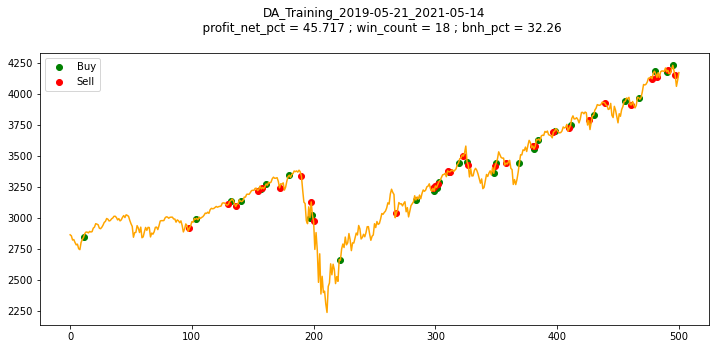

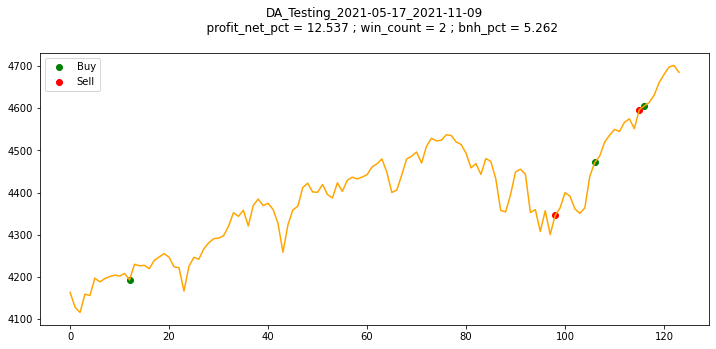

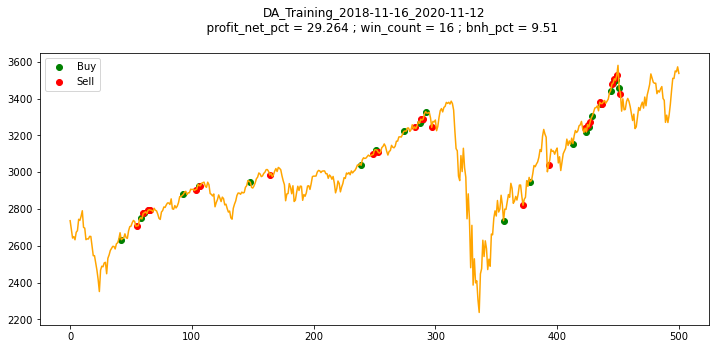

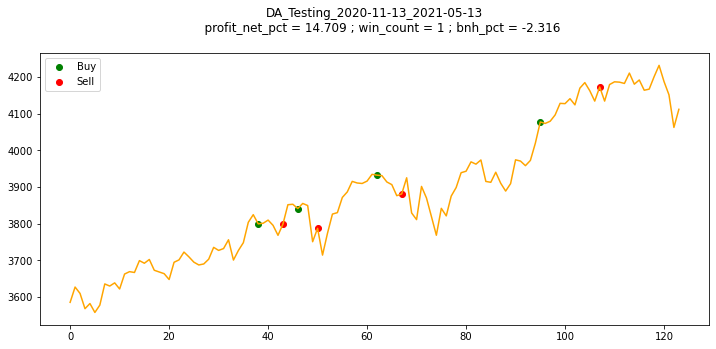

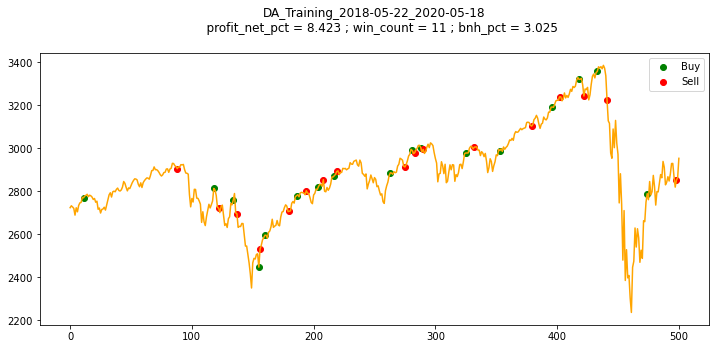

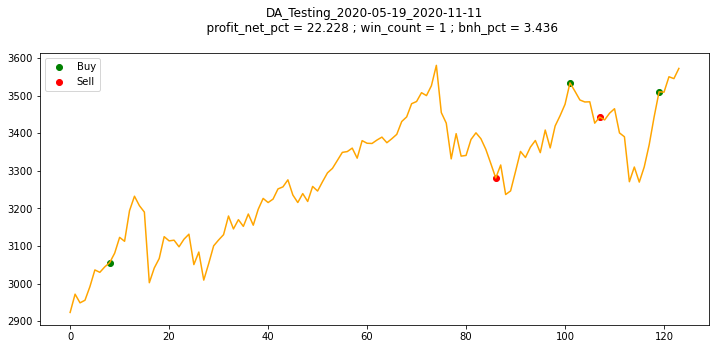

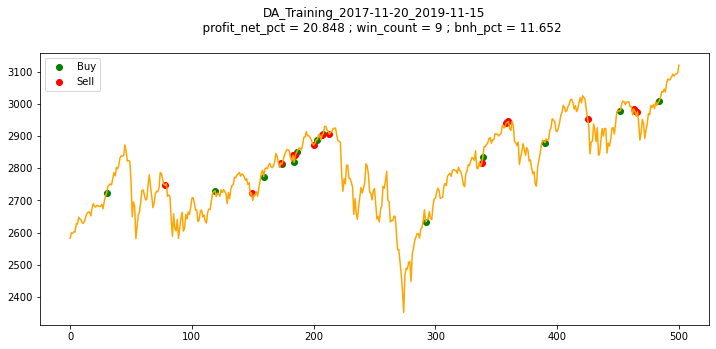

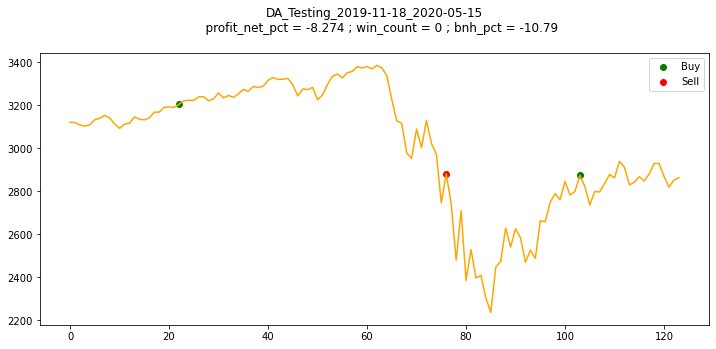

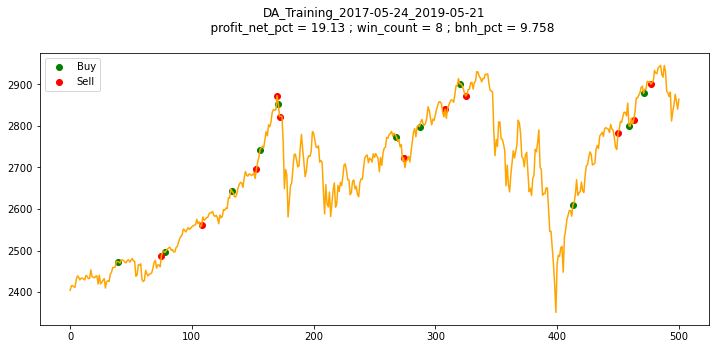

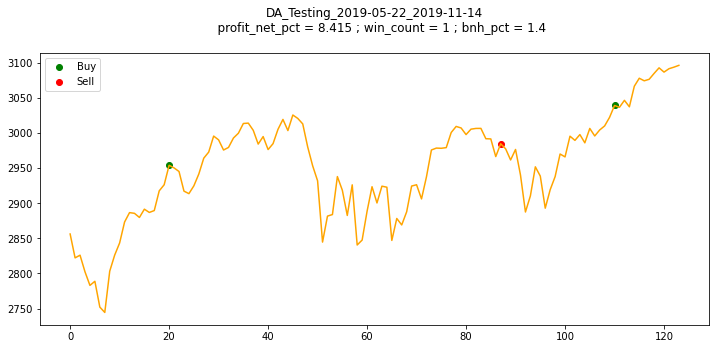

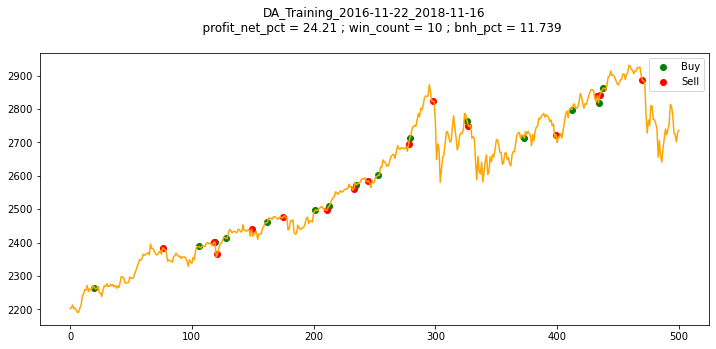

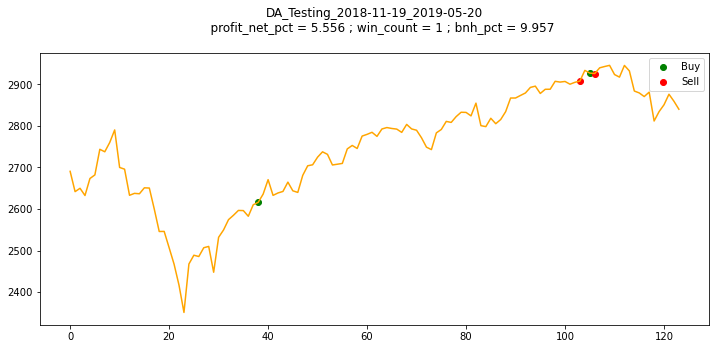

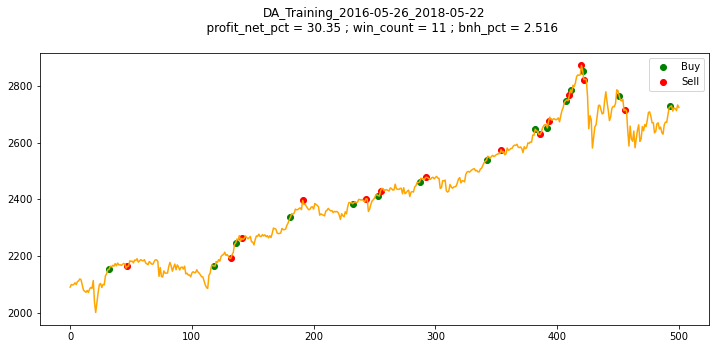

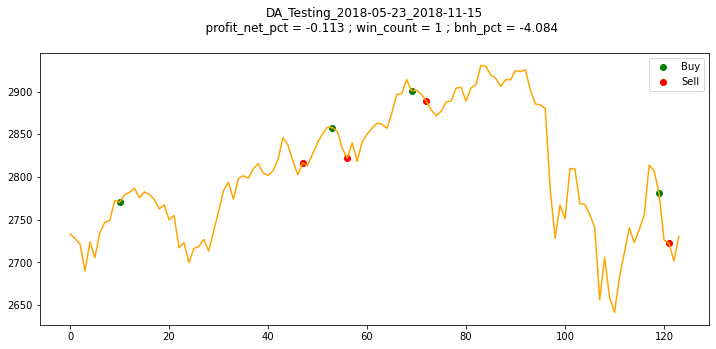

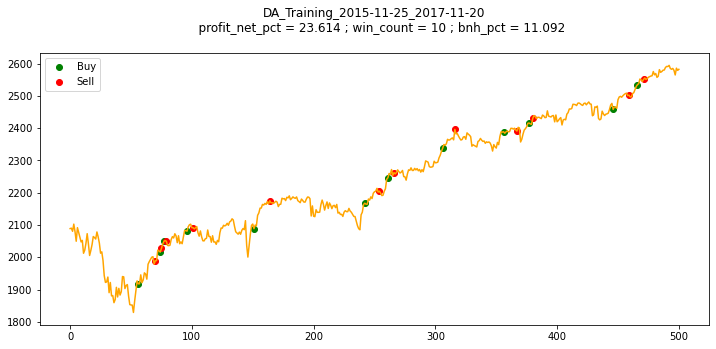

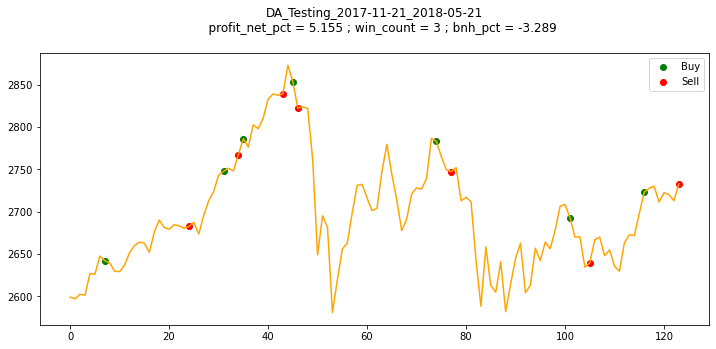

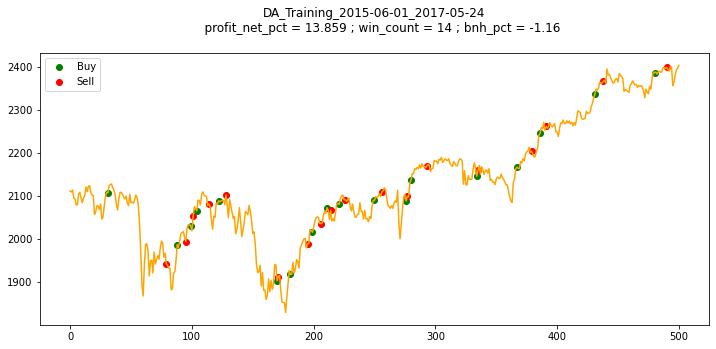

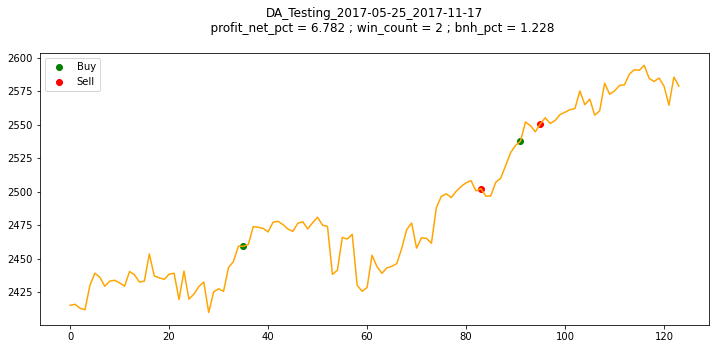

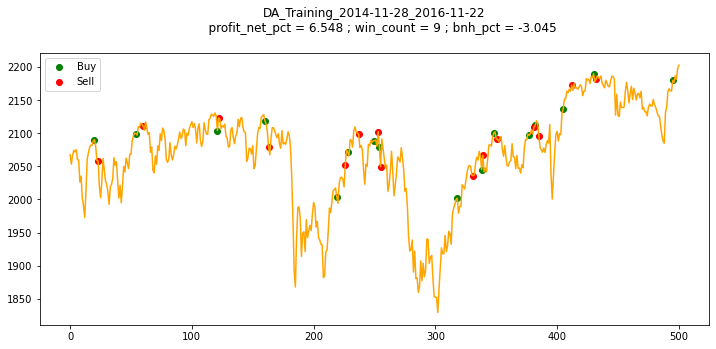

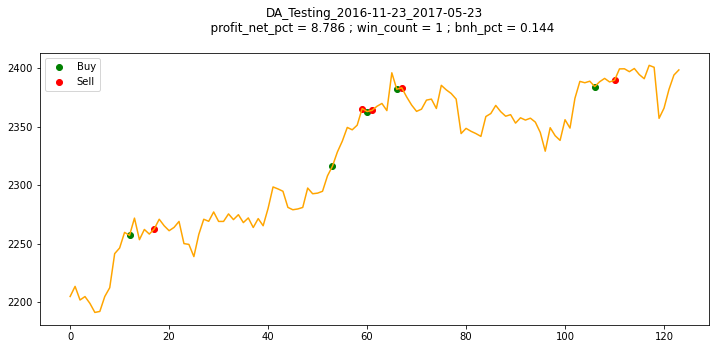

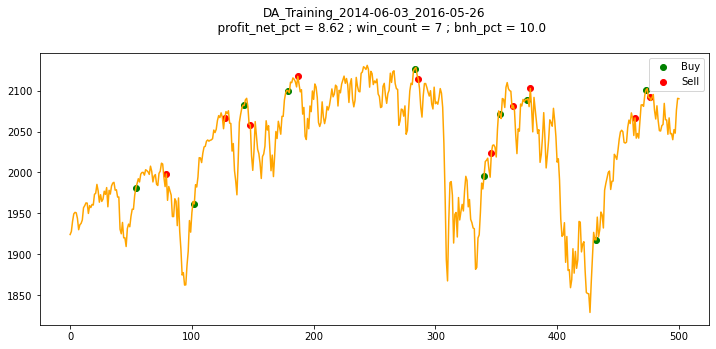

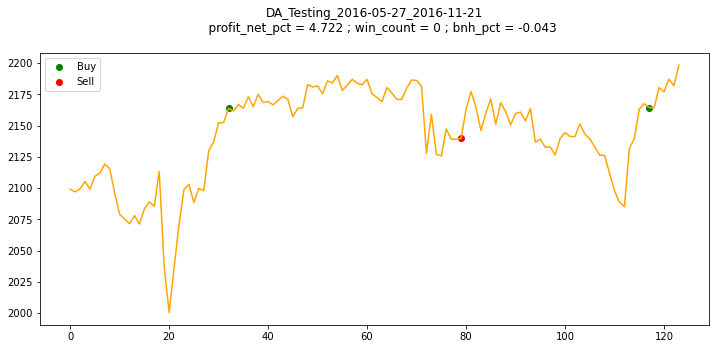

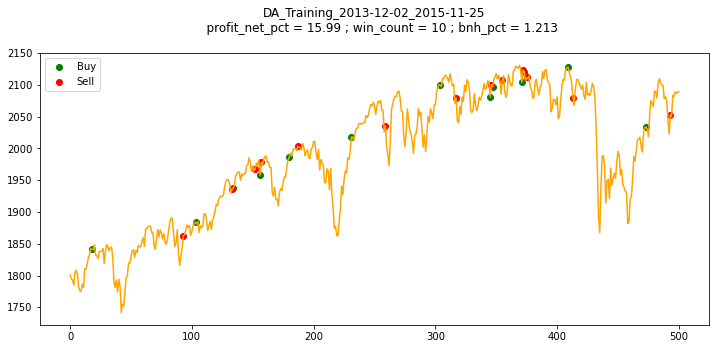

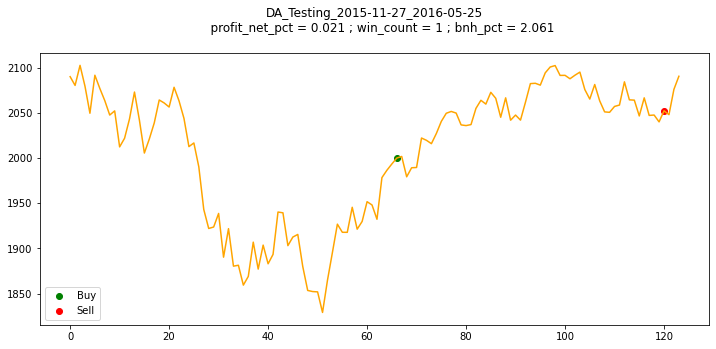

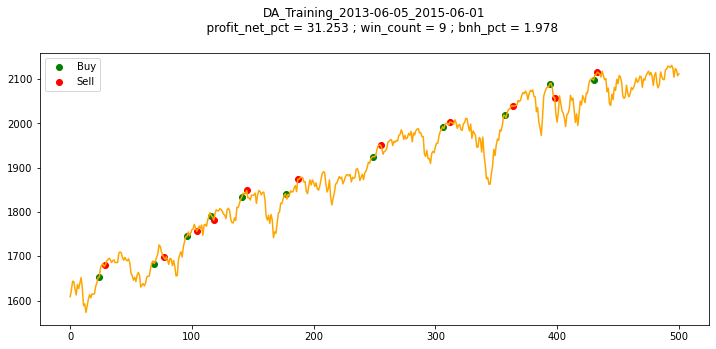

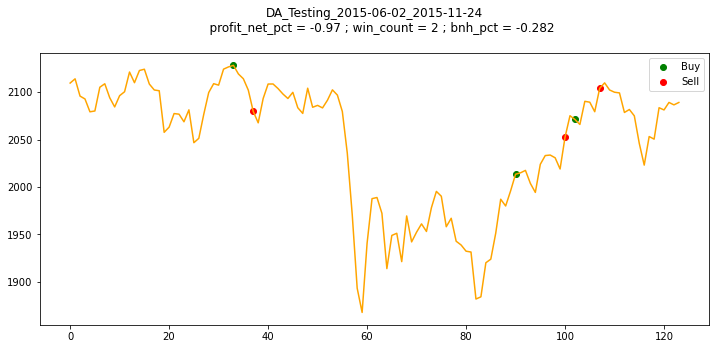

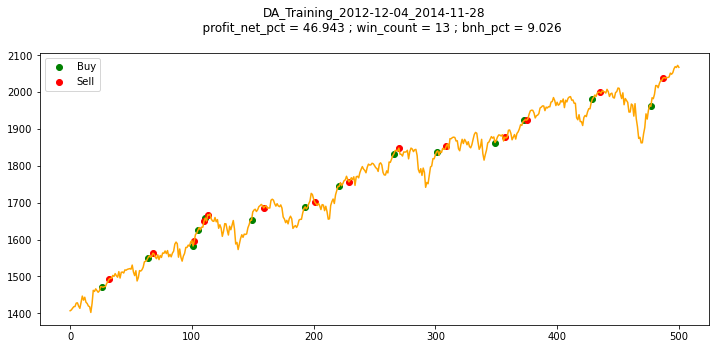

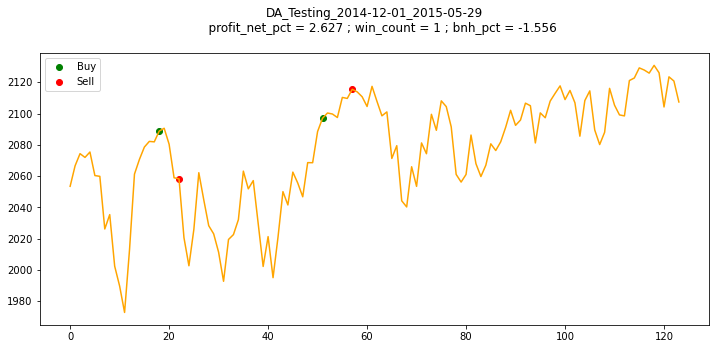

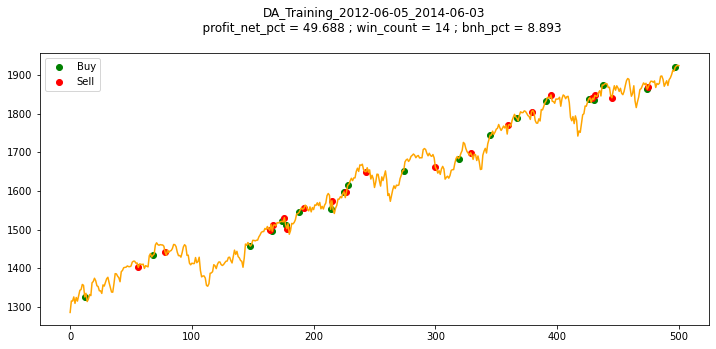

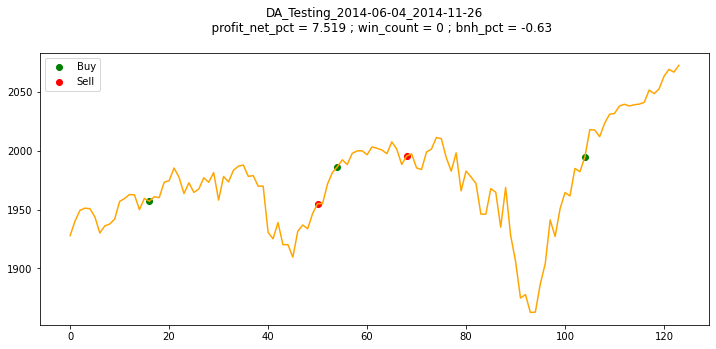

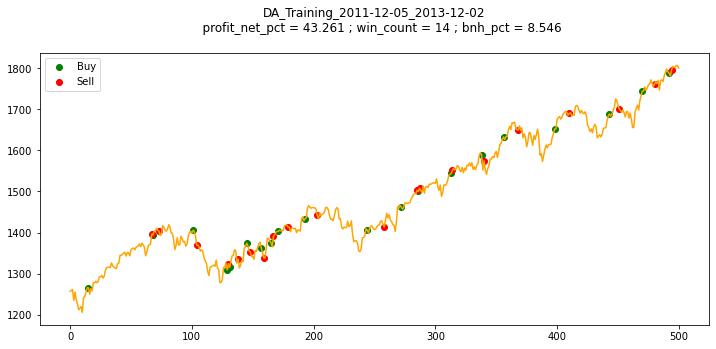

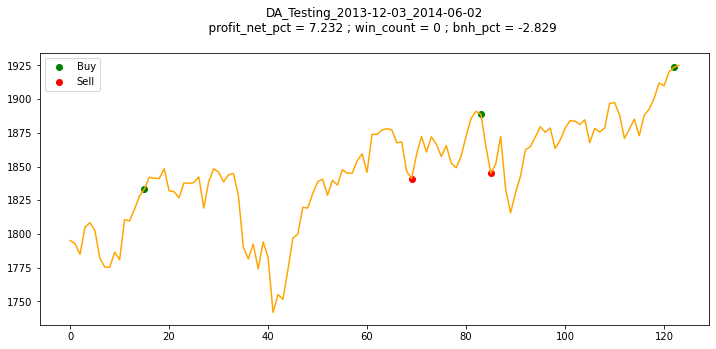

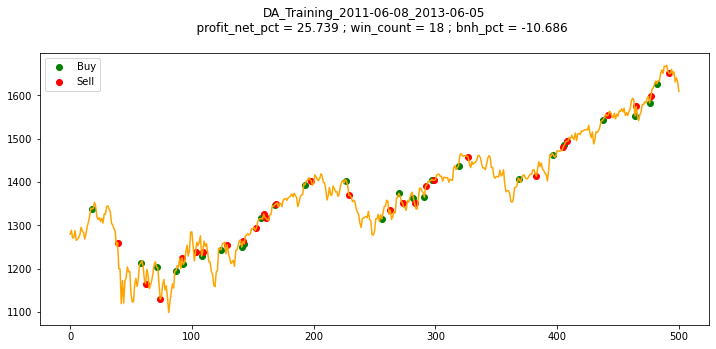

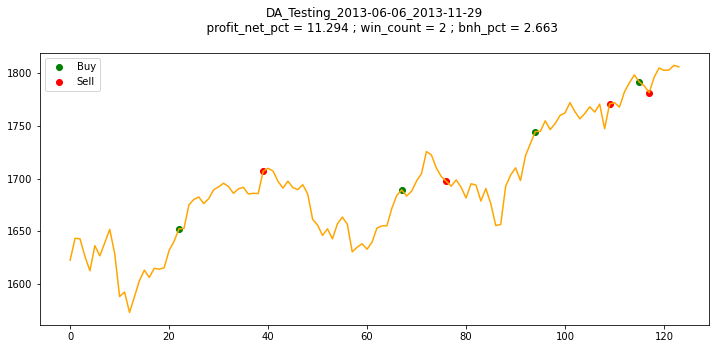

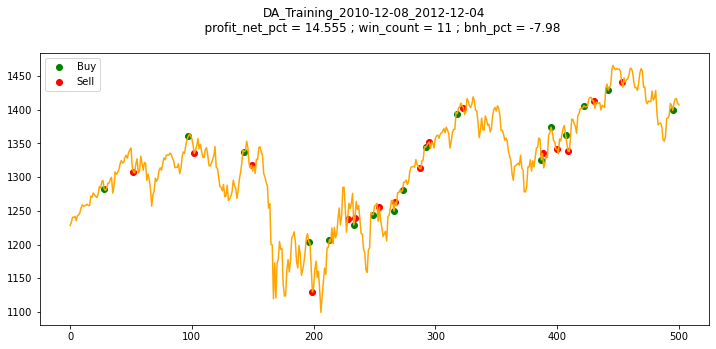

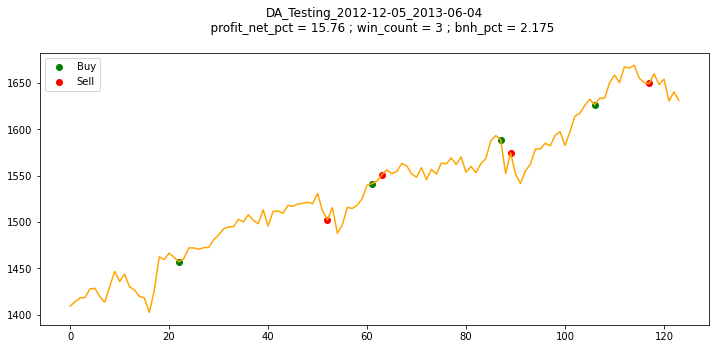

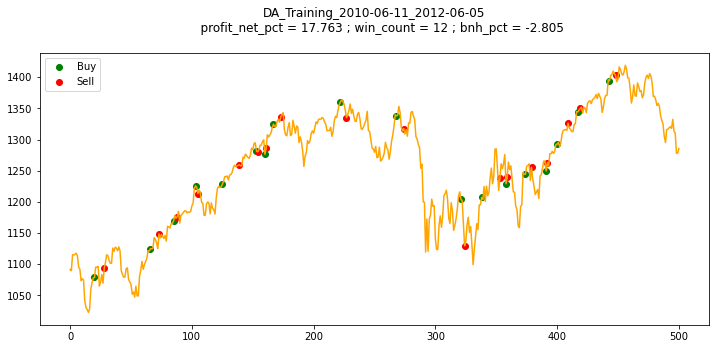

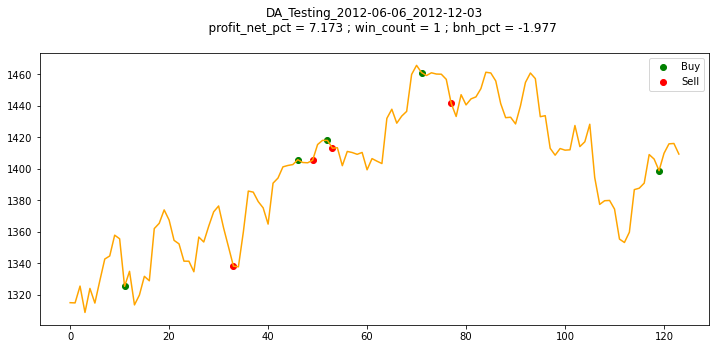

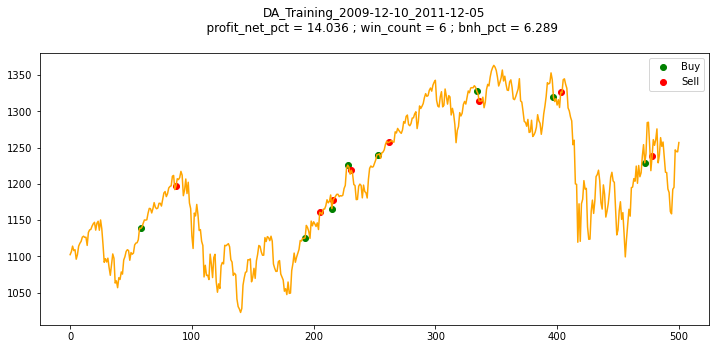

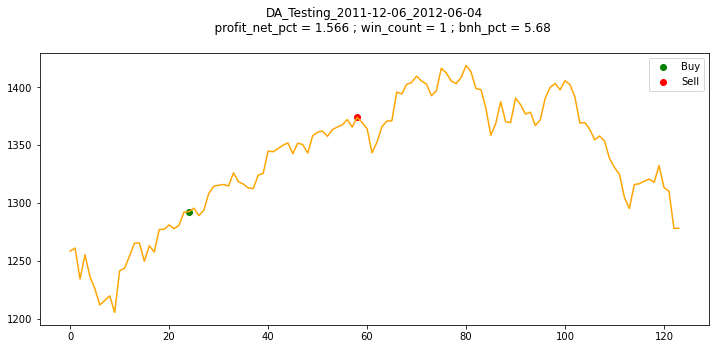

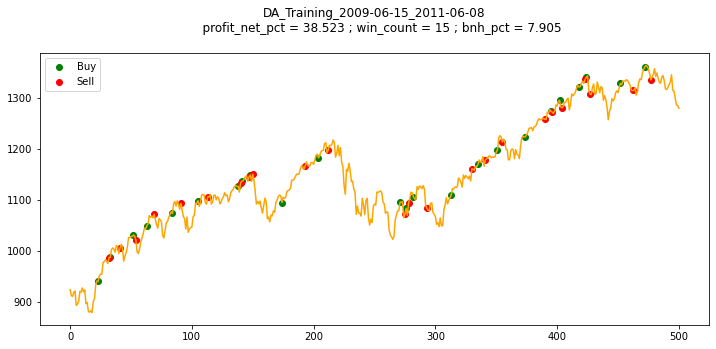

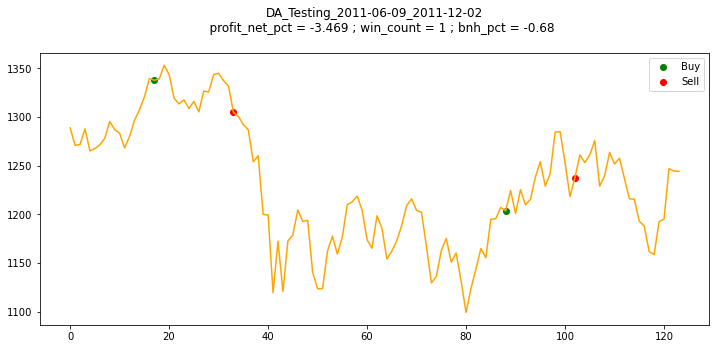

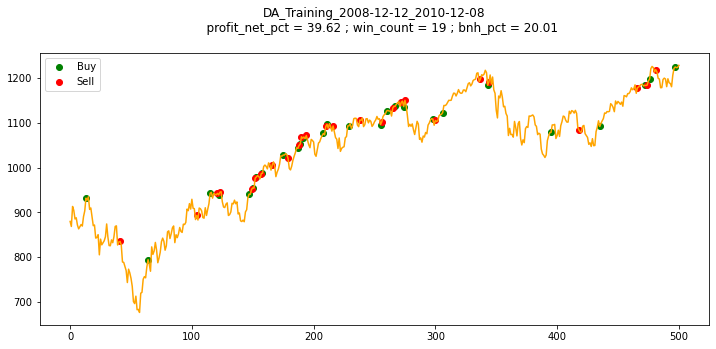

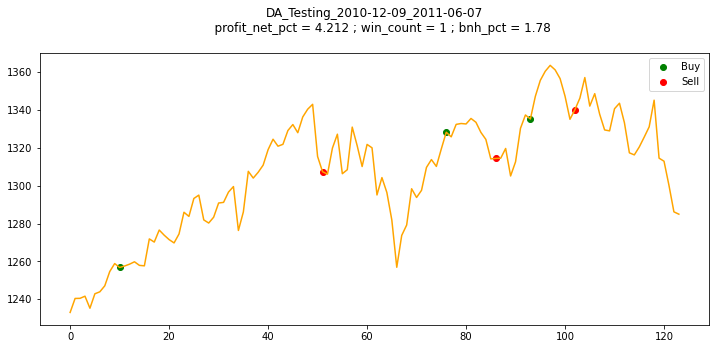

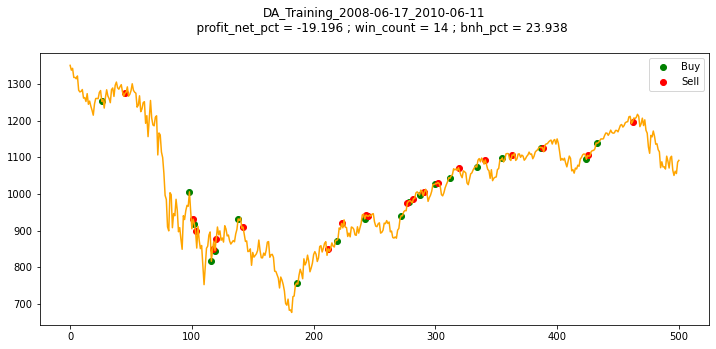

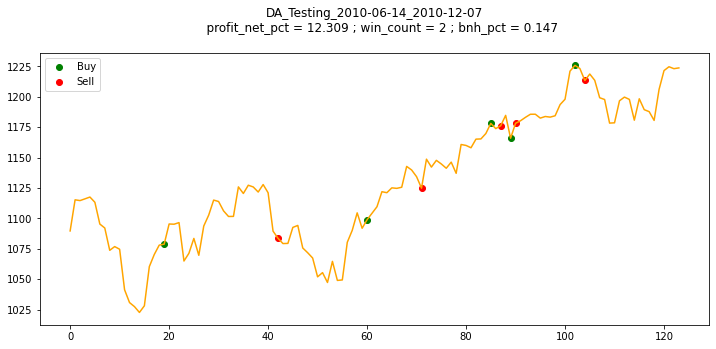

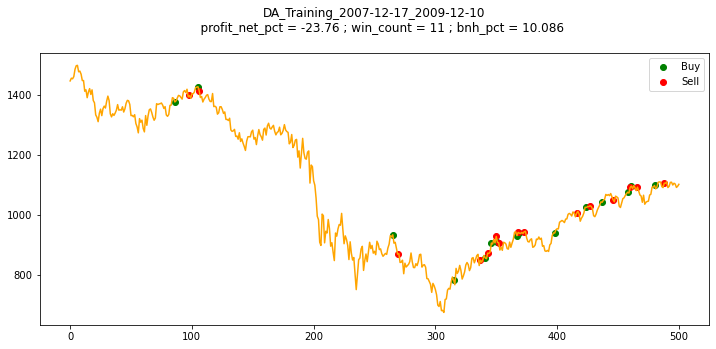

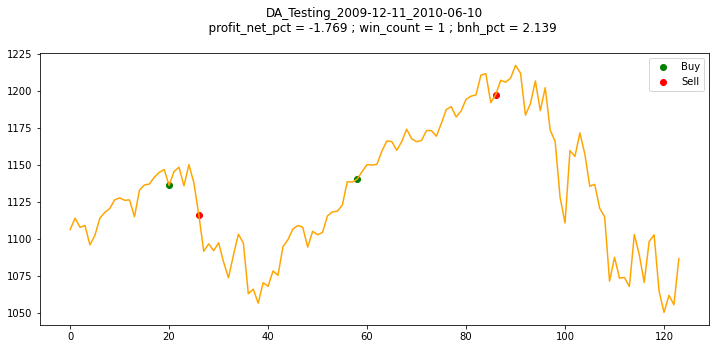

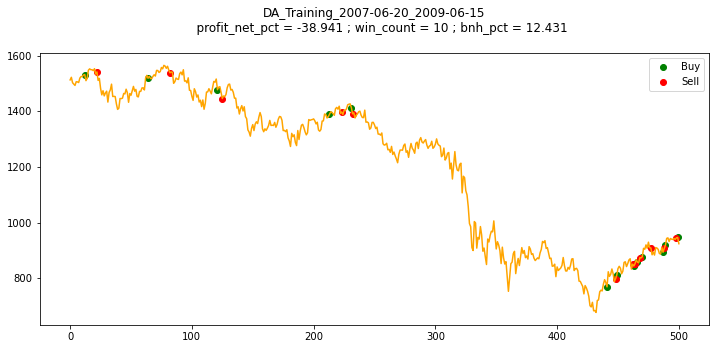

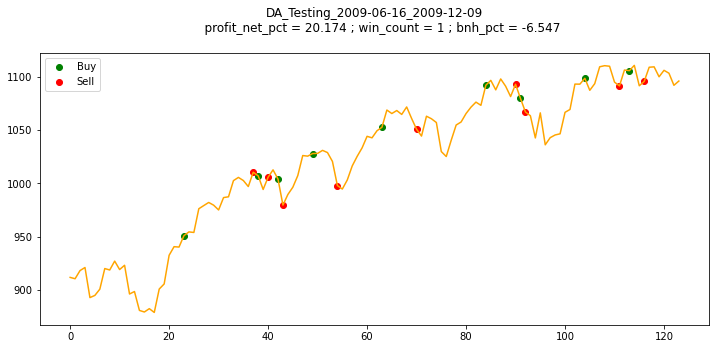

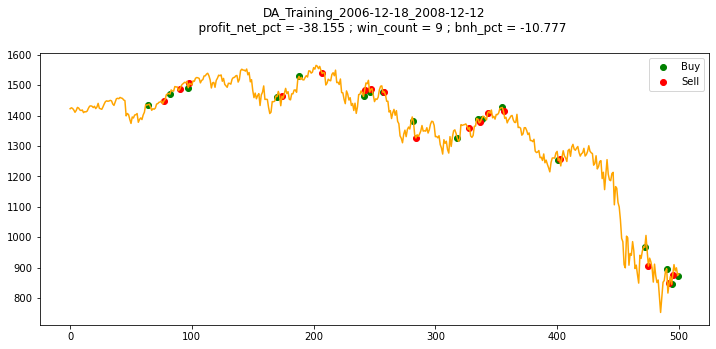

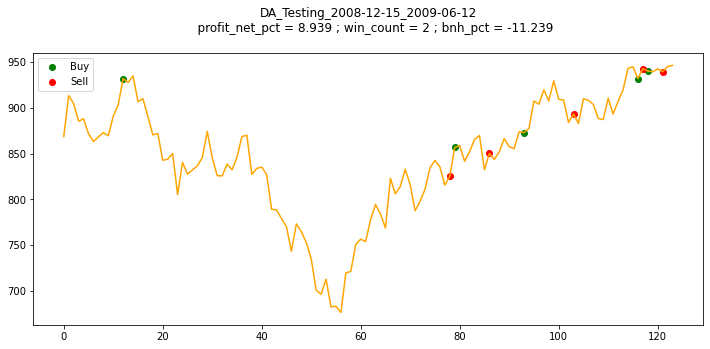

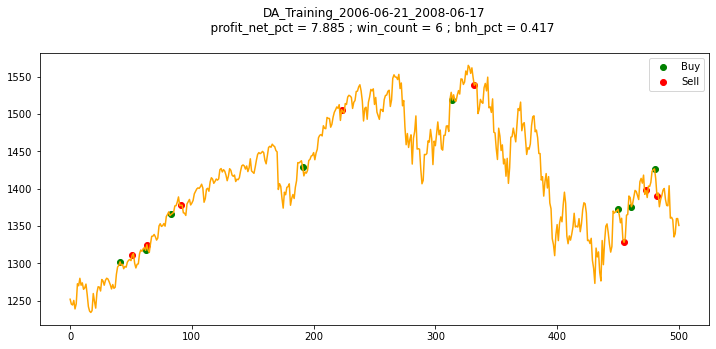

TypeError: type NoneType doesn't define __round__ method

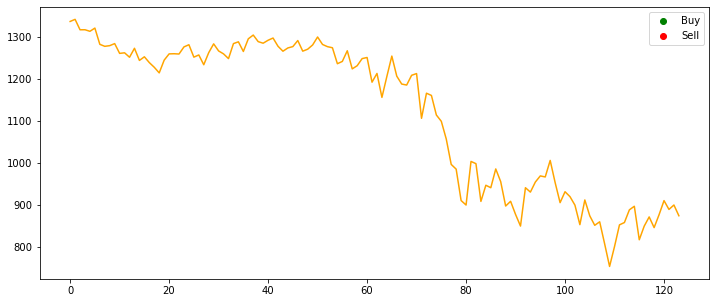

In [153]:
for t in results_titles:
    
    # get params for bt
    try:
        params = results[t]['Result']['x']
    except:
        params = results[t]['x']
        
    # get data for bt
    date_from, date_to = t.split('_')[-2:]
    rows_toview = df[(df['Date'] == date_from)].index[0], df[(df['Date'] == date_to)].index[0]
    df_temp = df.loc[rows_toview[0]:rows_toview[1], ['Date', 'Close', 'Close_ln']].copy()
    
    # run objective_func for bt
    objective_func(params)
    
    # ---------------------------------------------------------------------------------------------------
    # get points of actions for plotting
    
    buy_markers = []
    sell_markers = []

    for i in range(df_bt.shape[0]):
        if df_bt.loc[df_bt.index[i], 'Action Completed'] == 1:
            buy_markers.append(df_bt.loc[df_bt.index[i], 'Close'])
            sell_markers.append(None)

        elif df_bt.loc[i, 'Action Completed'] == -1:
            buy_markers.append(None)
            sell_markers.append(df_bt.loc[df_bt.index[i], 'Close'])

        else:
            buy_markers.append(None)
            sell_markers.append(None)

    
    # ----------------------------------------------------------------------------------------------------
    # plots of action points
    plt.figure(figsize = (12,5))
    plt.plot(df_bt['Close'], color = 'orange')
    plt.scatter(x = df_bt.index, y = buy_markers, color = 'green', label = "Buy")
    plt.scatter(x = df_bt.index, y = sell_markers, color = 'red', label = "Sell")
    
    plt.legend()
    plt.title('''{}
    profit_net_pct = {} ; win_count = {} ; bnh_pct = {}
    '''.format(t, round(txn_summary['profit_net_pct'],3), txn_summary['win_count'], round(txn_summary['bnh_pct'],3)))
    
#     plt.title('''
#     {}
#     Period: from {} to {}
#     '''.format(t,df_temp.loc[df_temp.index[0], 'Date'], df_temp.loc[df_temp.index[-1], 'Date']))
    
    img_filename = f'Graph_{strat_name} Results_{t}.png'
    plt.savefig(output_folder + '\\' + img_filename, dpi = 600)
    plt.show()
#     break

KeyError: 'DA'

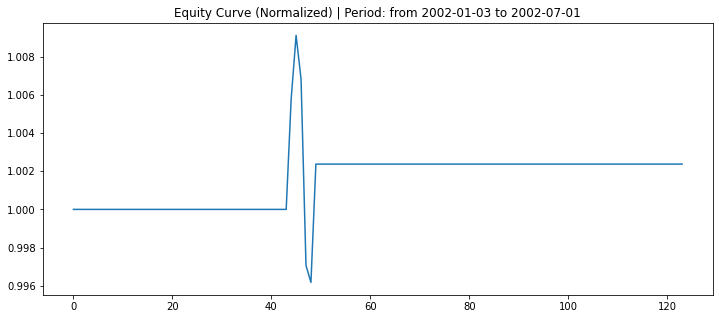

In [51]:
# # ------------------------------------------------------------------------------------------------------------
# plt.figure(figsize = (12,5))
# plt.plot(df_bt['Equity']/df_bt.loc[0, 'Equity'])
# plt.title('Equity Curve (Normalized) | Period: from {} to {}'.format(df_temp.loc[df_temp.index[0], 'Date'], df_temp.loc[df_temp.index[-1], 'Date']))
# print(results['DA'])

# plt.show()